# Explore colocalized annotations

## Setup

%matplotlib inline
%load_ext autoreload
%autoreload 2

%matplotlib inline
%load_ext autoreload
%autoreload 2

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [41]:
import matplotlib.pyplot as plt

from metaspace import SMInstance

In [75]:
sm = SMInstance(host='https://metaspace2020.eu')

In [76]:
ds = sm.dataset(id='2016-09-22_11h16m41s')
ds

SMDataset(Brain01_Bregma1-42_03b_centroid | ID: 2016-09-22_11h16m41s)

## Explore

In [77]:
def fetch_images(ds, annotations):
    ann_images = {}
    for formula, adduct in annotations:
        image = ds.isotope_images(formula, adduct, only_first_isotope=True)[0]
        ann_images[(formula, adduct)] = image
    return ann_images

In [78]:
database = 'HMDB-v4'
fdr = 0.1

In [97]:
formula, adduct = 'C44H86NO8P', '+K'
coloc_with = f'{formula}{adduct}+'
coloc_with

'C44H86NO8P+K+'

In [98]:
df = ds.results(database=database, fdr=fdr, coloc_with=coloc_with)
df.shape

(70, 10)

In [99]:
df.head()

,,msm,moc,rhoSpatial,rhoSpectral,fdr,mz,moleculeNames,moleculeIds,intensity,colocCoeff
formula,adduct,,,,,,,,,,
C44H86NO8P,+K,0.968373,0.998973,0.974551,0.994682,0.05,826.572242,"[PC(14:0/22:1(13Z)), PC(14:1(9Z)/22:0), PC(16:...","[HMDB0007887, HMDB0007919, HMDB0007978, HMDB00...",102675520.0,1.000000
C41H77O8P,+K,0.891320,0.998937,0.919016,0.970895,0.05,767.498742,"[PA(14:1(9Z)/24:1(15Z)), PA(16:0/22:2(13Z,16Z)...","[HMDB0114811, HMDB0114845, HMDB0114865, HMDB01...",31453472.0,0.990299
C44H84NO8P,+K,0.673025,0.998565,0.706544,0.953929,0.10,824.556592,"[PC(18:1(9Z)/18:1(9Z)), PC(14:0/22:2(13Z,16Z))...","[HMDB0000593, HMDB0007888, HMDB0007920, HMDB00...",22027492.0,0.988065
C41H77O8P,+Na,0.637693,0.998815,0.670961,0.951543,0.10,751.524805,"[PA(14:1(9Z)/24:1(15Z)), PA(16:0/22:2(13Z,16Z)...","[HMDB0114811, HMDB0114845, HMDB0114865, HMDB01...",8825182.0,0.987032
C46H84NO8P,+H,0.882796,0.998592,0.902701,0.979329,0.05,810.600710,"[PC(16:0/22:4(7Z,10Z,13Z,16Z)), PC(18:0/20:4(5...","[HMDB0007988, HMDB0008048, HMDB0008049, HMDB00...",26965624.0,0.980838


In [100]:
top_n = 10
top_coloc_anns = df.head(top_n).index.tolist()
len(top_coloc_anns)

10

In [101]:
most_coloc_images = fetch_images(ds, top_coloc_anns)
len(most_coloc_images)

10

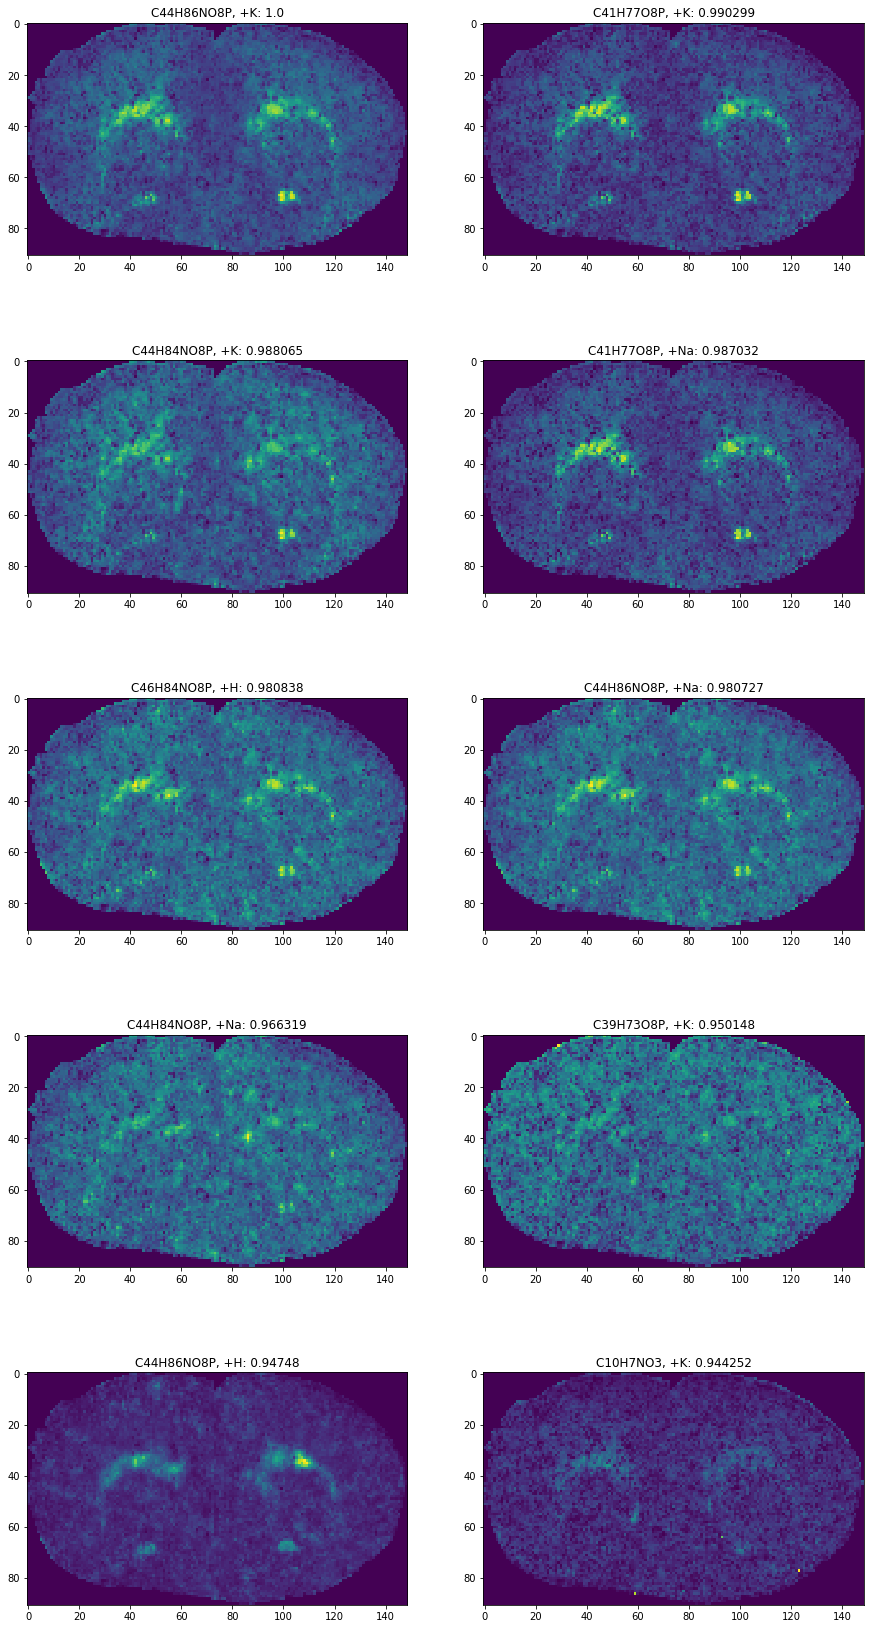

In [102]:
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
axes = axes.flatten()
for i, row in enumerate(df.head(top_n).itertuples()):
    formula, adduct = row.Index
    image = most_coloc_images[(formula, adduct)]
    axes[i].imshow(image)
    axes[i].set_title(f'{formula}, {adduct}: {row.colocCoeff}')